In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

In [2]:
# 單層建構函式
def make_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

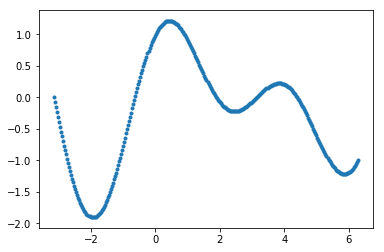

In [3]:
# 產生訓練資料
x_data = np.linspace(-np.pi,2*np.pi,300, dtype=np.float32)[:, np.newaxis]
y_data = np.cos(1.5*x_data)+np.sin(x_data) #Cos(2x)+Sin(3x)
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
# y_data = np.square(x_data) - 0.5 + noise
plt.scatter(x_data, y_data,marker='.')
plt.show()

In [4]:
# 定義輸出入變數
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

# 定義多層流程
my_activation_function = tf.nn.relu # 統一中間層活化函數
layer_hidden_1 = make_layer(xs, 1, 10, activation_function=my_activation_function)
layer_hidden_2 = make_layer(layer_hidden_1, 10, 10, activation_function=my_activation_function)
layer_output   = make_layer(layer_hidden_2, 10, 1) 

In [5]:
# 定義損失函數
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - layer_output), reduction_indices=[1]))

In [6]:
# 定義學習方法
train_step = tf.train.GradientDescentOptimizer(0.004).minimize(loss)

In [7]:
# 變數初始化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [19]:
# 訓練
for i in range(3000):
    _, cost = sess.run([train_step, loss], feed_dict={xs:x_data, ys:y_data})
    if(i%1000==0):
        print(cost)

0.323099
0.168836
0.115784


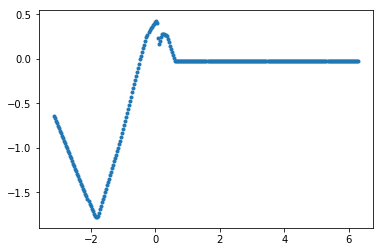

In [9]:
# 測試
x_test = [[i] for i in np.linspace(-np.pi,2*np.pi,300) ]
y_test = sess.run(layer_output, feed_dict={xs:x_test})
plt.scatter(x_test, y_test,marker='.')
plt.show()

In [10]:
# 同場加映 Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [11]:
svr_model = SVR()
svr_model.fit(X=x_data, y=y_data[:,0])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
predict_result = svr_model.predict(x_data)
print("PCCs = {}".format(np.corrcoef(x=predict_result, y=y_data[:,0])))
print("MSE  = {}".format(mean_squared_error(y_data[:,0], predict_result)))

PCCs = [[ 1.          0.99919548]
 [ 0.99919548  1.        ]]
MSE  = 0.005725546965086583


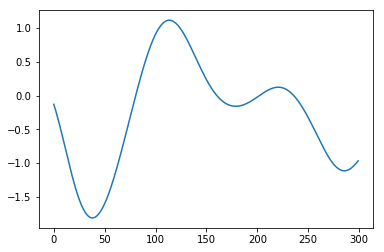

In [13]:
plt.plot(predict_result)
plt.show()

In [14]:
# 交叉驗證
k = 3
print("MSE ={}".format(cross_val_score(estimator=svr_model, X=x_data, y=y_data[:,0], cv=k, scoring='neg_mean_squared_error')))
print("PCCs={}".format(cross_val_score(estimator=svr_model, X=x_data, y=y_data[:,0], cv=k, scoring='r2')))

MSE =[-1.4959866  -0.22707678 -0.39504693]
PCCs=[-0.90779779  0.26845822 -0.27082134]
